Import Pandas and networkx

In [1]:
import pandas as pd
import networkx as nx

Read in CSV for edges, append league and country together, and group by node pairings

In [2]:
edgey = pd.read_csv('EdgesDirty.csv')


C:\Users\Owen\AppData\Local\Temp\ipykernel_15756\3625322132.py:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  edgey = pd.read_csv('EdgesDirty.csv')


In [3]:
edgey['LeagueCountry'] = edgey['LeagueCountry'].str.split(' ').str[1]
edgey["Comp"] = edgey["League"] + [" "] + edgey["LeagueCountry"]

In [4]:
edges = edgey.groupby(['Node1', 'Node2']).agg({
                                                'Season':lambda x: list(x),
                                                'Name1': 'first',
                                                'Name2': 'first',
                                                'Squad': lambda x: list(x),
                                                'Comp': lambda x: list(x),
                                                'LeagueRank' : lambda x: list(x),
                                                'Nation1': 'first',
                                                'Nation2': 'first',
                                                'Born1' : 'first',
                                                'Born2' : 'first',
                                                'MP1' : 'sum',
                                                'MP2': 'sum',
                                                'Goals1' : 'sum',
                                                'Goals2' : 'sum'

                                                }).reset_index()

Add a binary column for each top 5 league

In [5]:
leagues = ['1. Serie A ITA', '1. Premier League ENG', '1. Bundesliga GER', '1. La Liga ESP', '1. Ligue 1 FRA']
leagues2 = ['Serie A', 'Premier League', 'Bundesliga', 'La Liga', 'Ligue 1']
i = 0
for l in leagues:
    borb = []
    for row in edges['Comp']:
        # Add 1 to the row and append it to next_year
        if l in row:
            borb.append(1)
        else:
            borb.append(0)
    print(l, borb[0])
    edges[leagues[i]] = borb
    i += 1

1. Serie A ITA 0
1. Premier League ENG 0
1. Bundesliga GER 1
1. La Liga ESP 0
1. Ligue 1 FRA 0


Same proccess for nodes

In [6]:
df2 = pd.read_csv('PlayersCombFixed.csv')
df2 = df2.drop(columns=['Unnamed: 0'])
df2['Country'] = df2['Country'].str.split(' ').str[1]
df2["Comp"] = df2["Comp"] + [" "] + df2["Country"]
df3 = df2.groupby(['ID']).agg({
                                'Season':lambda x: list(x),
                                'Name': 'first',
                                'Squad': lambda x: list(x),
                                'Comp': lambda x: list(x),
                                'LgRank' : lambda x: list(x),
                                'CountryFixed': 'first',
                                'DOB' : 'first',
                                'MP' : 'sum',
                                'Gls' : 'sum',
                                         }).reset_index()

C:\Users\Owen\AppData\Local\Temp\ipykernel_15756\2138815997.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('PlayersCombFixed.csv')


In [7]:
i = 0
for l in leagues:
    borb = []
    for row in df3['Comp']:
        # Add 1 to the row and append it to next_year
        if l in row:
            borb.append(1)
        else:
            borb.append(0)
    print(l, borb[0])
    df3[leagues[i]] = borb
    i += 1

1. Serie A ITA 1
1. Premier League ENG 0
1. Bundesliga GER 0
1. La Liga ESP 0
1. Ligue 1 FRA 0


In [8]:
countries = edges
countrynodes = df3

In [9]:
countries['nationcomb'] = countries.apply(lambda x: sorted(list([x['Nation1'], x['Nation2']])), axis=1)
countries[['Country1','Country2']] = pd.DataFrame(countries.nationcomb.tolist(), index= countries.index)
# test['Country1'] = test['nationcomb'][0]
# test['Country2'] = test['nationcomb'][1]
countries

,Node1,Node2,Season,Name1,Name2,Squad,Comp,LeagueRank,Nation1,Nation2,...,Goals1,Goals2,1. Serie A ITA,1. Premier League ENG,1. Bundesliga GER,1. La Liga ESP,1. Ligue 1 FRA,nationcomb,Country1,Country2
0,00242b75,00242715,"[2018-2019, 2019-2020, 2020-2021, 2021-2022]",Leandro-Barreiro-Martins,Moussa-Niakhate,"[Mainz 05, Mainz 05, Mainz 05, Mainz 05]","[1. Bundesliga GER, 1. Bundesliga GER, 1. Bund...","[12th, 13th, 12th, 8th]",Luxembourg,France,...,3.0,9.0,0,0,1,0,0,"[France, Luxembourg]",France,Luxembourg
1,00459419,001a63e0,"[2012-2013, 2013-2014]",Marko-Arnautovic,Ozkan-Yildirim,"[Werder Bremen, Werder Bremen]","[1. Bundesliga GER, 1. Bundesliga GER]","[14th, 12th]",Austria,Germany,...,5.0,0.0,0,0,1,0,0,"[Austria, Germany]",Austria,Germany
2,005c0807,0033fb1b,"[2020-2021, 2021-2022]",Zinedine-Ferhat,Niclas-Eliasson,"[Nîmes, Nîmes]","[1. Ligue 1 FRA, 2. Ligue 2 FRA]","[19th, 9th]",Algeria,Sweden,...,6.0,11.0,0,0,0,0,1,"[Algeria, Sweden]",Algeria,Sweden
3,007b39a5,001a63e0,[2017-2018],Onel-Hernandez,Ozkan-Yildirim,[Braunschweig],[2. 2. Bundesliga GER],[17th],Cuba,Germany,...,1.0,1.0,0,0,0,0,0,"[Cuba, Germany]",Cuba,Germany
4,00891164,007faf7a,[2021-2022],Cedric-Hountondji,Lucas-Da-Cunha,[Clermont Foot],[1. Ligue 1 FRA],[17th],Benin,France,...,1.0,2.0,0,0,0,0,1,"[Benin, France]",Benin,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560411,fffea3e5,f6d7d690,[2020-2021],Jeremy-Doku,Josh-Cullen,[Anderlecht],[1. First Division A BEL],[4th],Belgium,Ireland,...,2.0,0.0,0,0,0,0,0,"[Belgium, Ireland]",Belgium,Ireland
560412,fffea3e5,f6ddac8f,[2018-2019],Jeremy-Doku,Ivan-Obradovic,[Anderlecht],[1. First Division A BEL],[6th],Belgium,Serbia,...,0.0,0.0,0,0,0,0,0,"[Belgium, Serbia]",Belgium,Serbia
560413,fffea3e5,f99b71de,"[2018-2019, 2019-2020, 2020-2021]",Jeremy-Doku,Edo-Kayembe,"[Anderlecht, Anderlecht, Anderlecht]","[1. First Division A BEL, 1. First Division A ...","[6th, 8th, 4th]",Belgium,Democratic Republic of the Congo,...,5.0,0.0,0,0,0,0,0,"[Belgium, Democratic Republic of the Congo]",Belgium,Democratic Republic of the Congo
560414,fffea3e5,fc46aab1,"[2021-2022, 2022-2023]",Jeremy-Doku,Lovro-Majer,"[Rennes, Rennes]","[1. Ligue 1 FRA, 1. Ligue 1 FRA]","[4th, 6th]",Belgium,Croatia,...,1.0,6.0,0,0,0,0,1,"[Belgium, Croatia]",Belgium,Croatia


### Function for edge country pairs for each league

In [11]:
def topcountrypairs(dfs,leagues,countries):
    i = 0
    dffinal = pd.DataFrame()
    for df in dfs:
        cpairs = df.groupby(['Country1', 'Country2']).agg({
            'source':'count'
        }).reset_index()
        cpairs.rename(columns={'source' : "Count"}, inplace=True)
        cpairs['Comp'] = leagues[i]
        cpairs.sort_values(by='Count', ascending=False)
        cpairs = cpairs.loc[(cpairs['Country1'] != countries[i]) & (cpairs['Country2'] != countries[i])]
        frames = [dffinal, cpairs]
        dffinal = pd.concat(frames)
        i += 1
    return dffinal

### Function for getting top countries for each league

In [12]:
def countrymakeup(dfs,leagues):
    i = 0
    dffinal = pd.DataFrame()
    for df in dfs:
        cpairs = df.groupby(['CountryFixed']).agg({
            'ID':'count'
        }).reset_index()
        cpairs.rename(columns={'ID' : "Count"}, inplace=True)
        cpairs['Comp'] = leagues[i]
        cpairs.sort_values(by='Count', ascending=False)
        # cpairs = cpairs.loc[(cpairs['Country1'] != countries[i]) & (cpairs['Country2'] != countries[i])]
        frames = [dffinal, cpairs]
        dffinal = pd.concat(frames)
        i += 1
    return dffinal

function to make sub graphs for each of the 5 leagues

In [13]:
def makesubgraphs(df, list):
    graphlist = []
    for l in list:
        dftemp = df.loc[df[l] > 0]
        dftemp.rename(columns={'Node1' : "source", 'Node2' : 'target'}, inplace=True)
        graphlist.append(dftemp)
    return graphlist

In [14]:
def makesubnodes(df, list):
    graphlist = []
    for l in list:
        dftemp = df.loc[df[l] > 0]
        graphlist.append(dftemp)
    return graphlist

# This creates League Graphs

In [15]:
top5leagues = ['1. Serie A ITA', '1. Premier League ENG', '1. Bundesliga GER', '1. La Liga ESP', '1. Ligue 1 FRA']
top5country = ['Italy', 'England', 'Germany', 'Spain', 'France']
leagueedges = makesubgraphs(edges, top5leagues)
leaguenodes = makesubgraphs(df3, top5leagues)
countrydf = topcountrypairs(leagueedges,top5leagues, top5country)
countrynodedf = countrymakeup(leaguenodes,top5leagues)


C:\Users\Owen\AppData\Local\Temp\ipykernel_15756\1857678669.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftemp.rename(columns={'Node1' : "source", 'Node2' : 'target'}, inplace=True)
C:\Users\Owen\AppData\Local\Temp\ipykernel_15756\1857678669.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftemp.rename(columns={'Node1' : "source", 'Node2' : 'target'}, inplace=True)
C:\Users\Owen\AppData\Local\Temp\ipykernel_15756\1857678669.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [48]:
countrynodedf = countrynodedf.sort_values(by=['Count'], ascending=False)
countrynodedf[0:30]
# countrynodedf.loc[countrynodedf['Comp'] == '1. Premier League ENG'][:30]

,CountryFixed,Count,Comp
34,England,657,1. Premier League ENG
94,Spain,144,1. Premier League ENG
38,France,138,1. Premier League ENG
53,Ireland,89,1. Premier League ENG
70,Netherlands,78,1. Premier League ENG
14,Brazil,76,1. Premier League ENG
85,Scotland,71,1. Premier League ENG
80,Portugal,67,1. Premier League ENG
107,Wales,59,1. Premier League ENG
4,Argentina,56,1. Premier League ENG


In [48]:
countrydf = countrydf.sort_values(by=['Count'], ascending=False)
countrydf[0:20]

,Country1,Country2,Count,Comp
202,Argentina,Brazil,666,1. Serie A ITA
194,Argentina,Argentina,515,1. Serie A ITA
138,Argentina,Brazil,422,1. La Liga ESP
596,Brazil,Brazil,419,1. Serie A ITA
1773,France,Spain,416,1. Premier League ENG
130,Argentina,Argentina,373,1. La Liga ESP
618,Brazil,France,350,1. Serie A ITA
158,Argentina,France,344,1. La Liga ESP
195,Argentina,Portugal,306,1. La Liga ESP
743,Brazil,Spain,289,1. Premier League ENG


Create graphs in networkx

In [17]:
def creategraphs(edges, nodes):
    listograph = []
    i = 0
    for e in edges:
        gtemp = nx.from_pandas_edgelist(e, edge_attr=['Season', 'Name1', 'Name2'])
        nodes_attr = nodes[i].set_index('ID').to_dict(orient = 'index')
        nx.set_node_attributes(gtemp, nodes_attr)
        listograph.append(gtemp)
        i+=1
    return listograph

In [18]:
graphs = creategraphs(leagueedges, leaguenodes)
graphs

# This plots Degree Distribution for a list of graphs

2475
100252
363
16
81.01171717171717
2354
70211
222
19
59.65250637213254
2035
61499
249
18
60.441277641277644
2507
80307
263
17
64.06621459912246
2616
81200
269
17
62.079510703363916


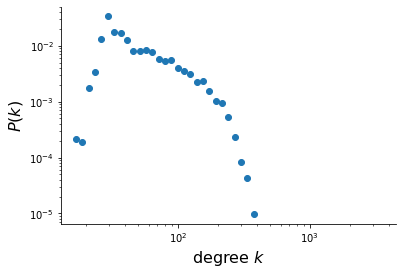

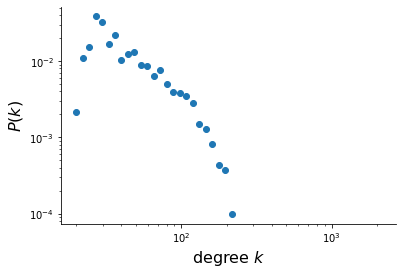

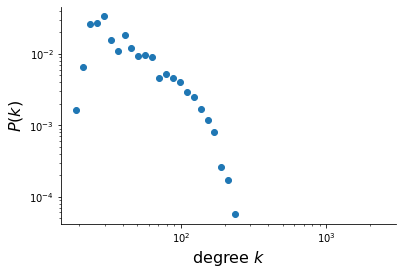

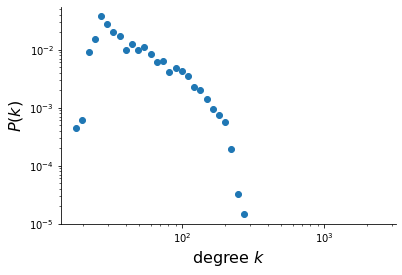

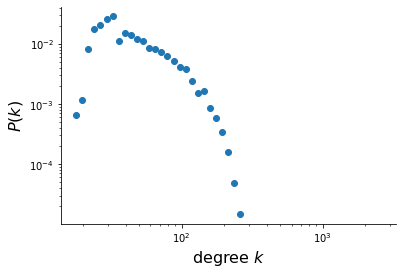

In [90]:
i = 0
for g in graphs:
    nodes = [n for n in g.nodes() if g.degree(n) > 18]
    gg = g.subgraph(nodes)
    graphs[i] = gg
    print(gg.number_of_nodes())
    print(gg.number_of_edges())
    plot_degree_dist(gg)
    i+=1

In [91]:
dfl = pd.DataFrame(columns=['League', 'Country Similarity','Clustering Coefficient','AVG Shortest Path', 'Density' ,'Max Degree', 'Min Degree', 'Mean Degree'])
dfl

,League,Country Similarity,Clustering Coefficient,AVG Shortest Path,Density,Max Degree,Min Degree,Mean Degree


Calculate summary statistics for all 5 graphs

In [92]:
from networkx import density
from networkx import attribute_assortativity_coefficient
import numpy as np
def calculate_metrics(G,league):
    d1 = attribute_assortativity_coefficient(G, 'CountryFixed')
    print('10% Done')
    d2 = np.mean(list(nx.clustering(G).values()))
    print('20% Done')
    d3 = nx.average_shortest_path_length(G,weight=None)
    print('30% Done')
    # d4 = nx.average_neighbor_degree(G)
    print('40% Done')
    # d5 = nx.rich_club_coefficient(G)
    # print('50% Done')
    # d6 = nx.omega(G)
    print('60% Done')
    d7 = density(G)
    degrees = [G.degree(n) for n in G.nodes()]
    print('70% Done')
    kmin = min(degrees)
    print('80% Done')
    kmax = max(degrees)
    print('90% Done')
    sum = 0
    for i in degrees:
        sum += i
    mean = sum / len(degrees)
    dftemp = {  'League' : league,
                'Country Similarity': d1,
                'Clustering Coefficient' : d2,
                'AVG Shortest Path': d3, 
                # 'Avg Nearest Neighbour Degree' : d4, 
                # 'Rich Club' : d5, 
                # 'Small World' : d6,
                'Density' : d7,
                'Max Degree' : kmax,
                'Min Degree': kmin, 
                'Mean Degree': mean }
    return dftemp

In [ ]:
i = 0
for g in graphs:
    d = calculate_metrics(g ,leagues[i])
    dfl = dfl.append(d, ignore_index=True)
    i+=1
dfl

In [ ]:
countries = ['Italy','England','Germany','Spain','France']
i = 0
n1 = 0
list5 = []
for n in leaguenodes:
    n1 = 0
    for row in n['CountryFixed']:
        # Add 1 to the row and append it to next_year
        if row == countries[i]:
            n1+=1
            print('hi')
        else:
            borb.append(0)
    list5.append(n1/len(n.index))
    i+=1
dfl['Home Country Ratio'] = list5

### Resulting dataframe to compare all 5 leagues

In [67]:
borb = []
borb1 = []
for g in graphs:
    borb.append(g.number_of_nodes())
    borb1.append(g.number_of_edges())

dfl['Nodes'] = borb
dfl['Edges'] = borb1
dfl


,League,Country Similarity,Clustering Coefficient,AVG Shortest Path,Density,Max Degree,Min Degree,Mean Degree,Home Country Ratio,Nodes,Edges
0,1. Serie A ITA,0.026123,0.634170,2.287405,0.032745,363,16,81.011717,0.364035,2475,100252
1,1. Premier League ENG,0.015250,0.689980,2.505569,0.025352,222,19,59.652506,0.274207,2354,70211
2,1. Bundesliga GER,0.005721,0.684402,2.409154,0.029715,249,18,60.441278,0.371359,2035,61499
3,1. La Liga ESP,0.025144,0.672973,2.431889,0.025565,263,17,64.066215,0.496296,2507,80307
4,1. Ligue 1 FRA,0.007823,0.679911,2.501902,0.023740,269,17,62.079511,0.399101,2616,81200


In [73]:
degrees = sorted(graphs[4].degree, key=lambda x: x[1], reverse=True)
degrees[0]

('f3642ba8', 269)

In [29]:
# Function Defintions
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from sympy import deg
%matplotlib inline
import math
# Function Defintions
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    print(kmax)
    print(kmin)
    mybins = math.ceil(math.sqrt(G.number_of_nodes()))
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=mybins)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, mybins=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    sum = 0
    for i in degrees:
        sum += i
    mean = sum / len(degrees)
    print(mean)

# START OF COMMUNITIES

In [ ]:
import matplotlib.cm as cm
from networkx import community_louvain


In [19]:
# gnodes = pd.read_csv('nodesForOwen.csv')
edges.rename(columns={'Node1' : "source", 'Node2' : 'target'}, inplace=True)
graphcom = nx.from_pandas_edgelist(edges, edge_attr=['Season', 'Name1', 'Name2'])
# nodes_attr = gnodes.set_index('ID').to_dict(orient = 'index')
# nx.set_node_attributes(graphcom, nodes_attr)

In [ ]:
import community as community_louvain
import matplotlib.cm as cm

partition = community_louvain.best_partition(graphcom)
coms = pd.DataFrame(partition.items(), columns=['ID', 'Community'])
gnodes = nodes.merge(coms, on="ID")
nodes_attr = nodes.set_index('ID').to_dict(orient = 'index')
nx.set_node_attributes(graphcom, nodes_attr)

### Creating community sub graphs

In [20]:
def createcomgraphs(F):
    listograph = []
    for j in range(5):
        com = [x for x in F.nodes() if F.nodes[x]['Community'] == j]
        H = F.subgraph(com)
        # gtemp = nx.from_pandas_edgelist(e, edge_attr=['Season', 'Name1', 'Name2'])
        # nodes_attr = nodes[i].set_index('ID').to_dict(orient = 'index')
        # nx.set_node_attributes(gtemp, nodes_attr)
        listograph.append(H)
    return listograph

In [21]:
def countrymakeupCom(dfs):
    i = 0
    dffinal = pd.DataFrame()
    for df in dfs:
        cpairs = df.groupby(['CountryFixed']).agg({
            'ID':'count'
        }).reset_index()
        cpairs.rename(columns={'ID' : "Count"}, inplace=True)
        cpairs['Community'] = i
        cpairs.sort_values(by='Count', ascending=False)
        # cpairs = cpairs.loc[(cpairs['Country1'] != countries[i]) & (cpairs['Country2'] != countries[i])]
        frames = [dffinal, cpairs]
        dffinal = pd.concat(frames)
        i += 1
    return dffinal

In [22]:
def makecomnodes(df):
    graphlist = []
    for i in range(5):
        dftemp = df.loc[df['Community'] == i]
        graphlist.append(dftemp)
    return graphlist

# Graph for each community

In [23]:
comnodeslist = makecomnodes(gnodes)


### Country make up for each community

In [25]:
makeupcom = countrymakeupCom(comnodeslist)
makeupcom = makeupcom.sort_values(by=['Count'], ascending=False)
makeupcom[0:30]

,CountryFixed,Count,Community
82,Spain,1241,4
31,France,985,1
44,Italy,909,3
35,Germany,761,0
31,England,657,2
3,Argentina,134,4
11,Brazil,131,3
3,Argentina,111,3
80,Senegal,96,1
11,Brazil,91,1


In [27]:
comgraphs = createcomgraphs(graphcom)
comgraphs

1769
67972
243
19
76.84793668739401
2168
82866
228
19
76.44464944649447
1671
73274
227
18
87.70077797725912
2012
108665
330
19
108.0168986083499
2067
89115
255
15
86.22641509433963


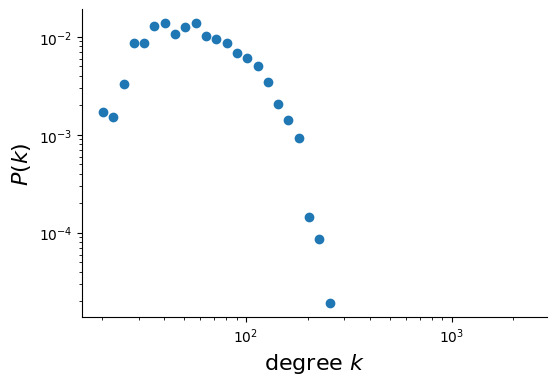

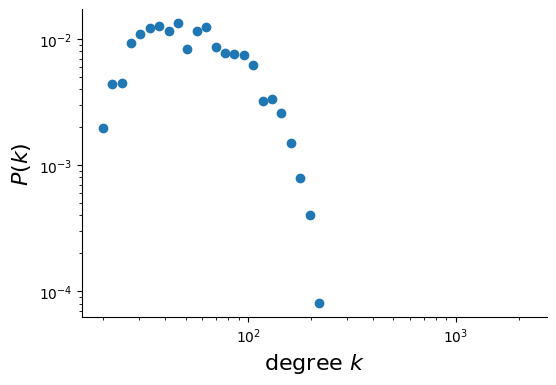

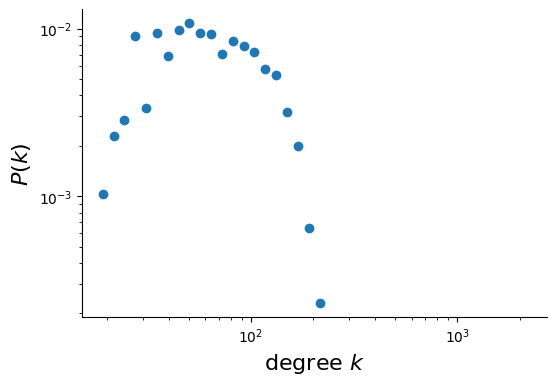

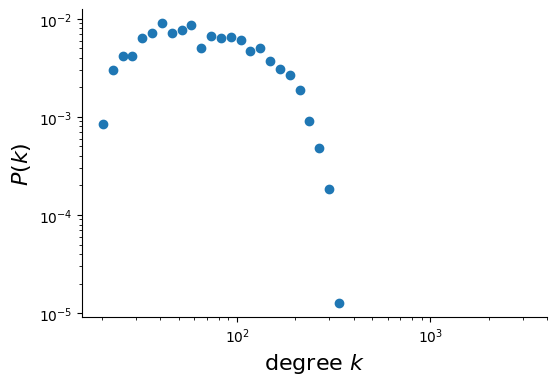

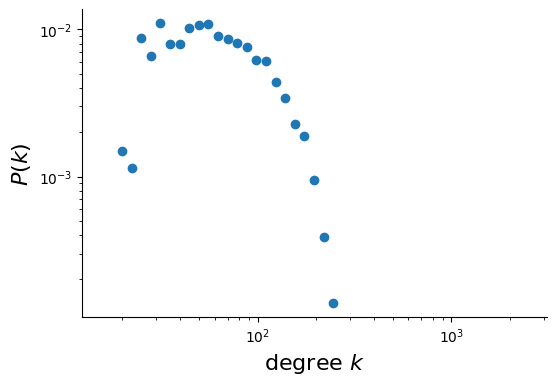

In [30]:
i = 0
for g in comgraphs:
    nodes = [n for n in g.nodes() if g.degree(n) > 18]
    gg = g.subgraph(nodes)
    comgraphs[i] = gg
    print(gg.number_of_nodes())
    print(gg.number_of_edges())
    plot_degree_dist(gg)
    i+=1

In [95]:
dfl2 = pd.DataFrame(columns=['League', 'Country Similarity','Clustering Coefficient','AVG Shortest Path', 'Density' ,'Max Degree', 'Min Degree', 'Mean Degree'])

In [97]:
# del list
top5leagues = ['1. Bundesliga GER','1. Ligue 1 FRA','1. Premier League ENG', '1. Serie A ITA',  '1. La Liga ESP']
i = 0
for g in comgraphs:
    print(i)
    d = calculate_metrics(g ,top5leagues[i])
    dfl2 = dfl2.append(d, ignore_index=True)
    i+=1
dfl2

0
10% Done
20% Done
30% Done
40% Done
60% Done
70% Done
80% Done
90% Done
1
10% Done
20% Done
30% Done
40% Done
60% Done
70% Done
80% Done
90% Done
2
10% Done
20% Done
30% Done
40% Done
60% Done
70% Done
80% Done
90% Done
3
10% Done
20% Done
30% Done
40% Done
60% Done
70% Done
80% Done
90% Done
4
10% Done
20% Done
30% Done
40% Done
60% Done
70% Done
80% Done
90% Done


,League,Country Similarity,Clustering Coefficient,AVG Shortest Path,Density,Max Degree,Min Degree,Mean Degree
0,1. Bundesliga GER,0.032806,0.447319,2.167758,0.043466,243,19,76.847937
1,1. Ligue 1 FRA,0.014819,0.476477,2.253642,0.035277,228,19,76.444649
2,1. Premier League ENG,0.028718,0.380569,2.101809,0.052515,227,18,87.700778
3,1. Serie A ITA,0.043418,0.412141,2.071862,0.053713,330,19,108.016899
4,1. La Liga ESP,0.061011,0.432766,2.166448,0.041736,255,15,86.226415


### Metrics to compare Communities

In [99]:
borb = []
borb1 = []
for g in comgraphs:
    borb.append(g.number_of_nodes())
    borb1.append(g.number_of_edges())

dfl2['Nodes'] = borb
dfl2['Edges'] = borb1
dfl2

,League,Country Similarity,Clustering Coefficient,AVG Shortest Path,Density,Max Degree,Min Degree,Mean Degree,Nodes,Edges
0,1. Bundesliga GER,0.032806,0.447319,2.167758,0.043466,243,19,76.847937,1769,67972
1,1. Ligue 1 FRA,0.014819,0.476477,2.253642,0.035277,228,19,76.444649,2168,82866
2,1. Premier League ENG,0.028718,0.380569,2.101809,0.052515,227,18,87.700778,1671,73274
3,1. Serie A ITA,0.043418,0.412141,2.071862,0.053713,330,19,108.016899,2012,108665
4,1. La Liga ESP,0.061011,0.432766,2.166448,0.041736,255,15,86.226415,2067,89115


# Exploratory Jaccard Work

Convert season column to a single year

In [53]:
edgesjack = pd.read_csv('EdgesDirty.csv')
edgesjack.groupby('Season').agg({
    'Name1' : 'count'
})

edgesjack['SingleYear'] = edgesjack['Season'].map(lambda x : str(x)[:4])
edgesjack['SingleYear'] = edgesjack['SingleYear'].astype(int)

edgesjack

C:\Users\Owen\AppData\Local\Temp\ipykernel_15756\3548293530.py:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  edgesjack = pd.read_csv('EdgesDirty.csv')


,Name1,Name2,Season,Squad,League,LeagueRank,LeagueCountry,Nation1,Nation2,Born1,Born2,MP1,MP2,Goals1,Goals2,Node1,Node2,SingleYear
0,Sergio-Abad-Beyxer,Sergio-Ballesteros,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1975,1,35,0.0,1.0,30f729b3,29863c56,2010
1,Sergio-Abad-Beyxer,David-Cerrajeria,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1983,1,9,0.0,0.0,30f729b3,2ebb9df6,2010
2,Sergio-Abad-Beyxer,Rafa-Jorda,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1984,1,17,0.0,2.0,30f729b3,05e805eb,2010
3,Sergio-Abad-Beyxer,Gorka-Larrea,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Spain,1989,1984,1,6,0.0,0.0,30f729b3,242e09b6,2010
4,Sergio-Abad-Beyxer,Cristhian-Stuani,2010-2011,Levante,1. La Liga,14th,es ESP,Spain,Uruguay,1989,1986,1,30,0.0,8.0,30f729b3,220c11f1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901966,Michael-Zetterer,Ilia-Gruev,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,Bulgaria,1995,2000,1,8,0.0,0.0,9b688ae1,1fc4f3d1,2022
901967,Michael-Zetterer,Amos-Pieper,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,Germany,1995,1998,1,8,0.0,0.0,9b688ae1,526ea7cc,2022
901968,Michael-Zetterer,Romano-Schmid,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,Austria,1995,2000,1,8,0.0,0.0,9b688ae1,220ace7e,2022
901969,Michael-Zetterer,Lee-Buchanan,2022-2023,Werder Bremen,1. Bundesliga,5th,de GER,Germany,England,1995,2001,1,7,0.0,1.0,9b688ae1,45e95f21,2022


Create 2 new dataframes, pre and post 2015

In [54]:
pre2015Edges = edgesjack[edgesjack['SingleYear'] <= 2015]
post2015Edges = edgesjack[edgesjack['SingleYear'] > 2015]
pre2015Edges = pre2015Edges.groupby(['Node1', 'Node2']).agg({
                                                'Season':lambda x: list(x),
                                                'Name1': 'first',
                                                'Name2': 'first',
                                                'Squad': lambda x: list(x),
                                                'League': lambda x: list(x),
                                                'LeagueRank' : lambda x: list(x),
                                                'Nation1': 'first',
                                                'Nation2': 'first',
                                                'Born1' : 'first',
                                                'Born2' : 'first',
                                                'MP1' : 'sum',
                                                'MP2': 'sum',
                                                'Goals1' : 'sum',
                                                'Goals2' : 'sum'

                                                }).reset_index()

post2015Edges = post2015Edges.groupby(['Node1', 'Node2']).agg({
                                                'Season':lambda x: list(x),
                                                'Name1': 'first',
                                                'Name2': 'first',
                                                'Squad': lambda x: list(x),
                                                'League': lambda x: list(x),
                                                'LeagueRank' : lambda x: list(x),
                                                'Nation1': 'first',
                                                'Nation2': 'first',
                                                'Born1' : 'first',
                                                'Born2' : 'first',
                                                'MP1' : 'sum',
                                                'MP2': 'sum',
                                                'Goals1' : 'sum',
                                                'Goals2' : 'sum'

                                                }).reset_index()


pre2015Edges.rename(columns={'Node1' : "source", 'Node2' : 'target'}, inplace=True)
post2015Edges.rename(columns={'Node1' : "source", 'Node2' : 'target'}, inplace=True)


G2015 = nx.from_pandas_edgelist(pre2015Edges, edge_attr=['Season', 'Name1', 'Name2'])
GPost2015 = nx.from_pandas_edgelist(post2015Edges, edge_attr=['Season', 'Name1', 'Name2'])


# 454042 + 447929 <= 2015 and > 
# 901971  
# edgesCopy

filtered by nodes with more than 1 squad to avoid outliers

In [55]:
node_degree_dict=nx.degree(G2015)
G2015Filtered=nx.subgraph(G2015,[x for x in G2015.nodes() if node_degree_dict[x]>19])

## Read in Jaccard Values

In [ ]:
jackDf = pd.read_csv('jackValues.csv')



### DO NOT RUN IF READING IN DF
#### Creates jaccard dataframe

In [ ]:
jacksGraphPre2015 = list(nx.jaccard_coefficient(G2015Filtered))
jacksGraphPre2015.sort(key=lambda x: x[2], reverse=True)
jackDf = pd.DataFrame(jacksGraphPre2015, columns=['ID1','ID2', 'JacardValue'])

jackDf.to_csv('jackValues.csv', index=False)

Add names to dataframe

In [ ]:
nameDict = pd.Series(nodes.Name.values, index=nodes.ID).to_dict()
jackDf['Name1'] = jackDf['ID1'].map(nameDict)
jackDf["Name2"] = jackDf['ID2'].map(nameDict)

Calculate results on post 2015 dataframe. jdf can be updated based on the value calculated on

In [ ]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    jdf = jackDf[jackDf['JacardValue'] > 0.5]
    jacardPredictedResults = post2015Edges[post2015Edges['source'] == '']
    for (index, row) in jdf.iterrows():
        print(i)
        test = post2015Edges[((post2015Edges['source'] == jdf.at[index, 'ID1']) & (post2015Edges['target'] == jdf.at[index, 'ID2'])) | ((post2015Edges['target'] == jdf.at[index, 'ID1']) & (post2015Edges['source'] == jdf.at[index, 'ID2']))]
        jacardPredictedResults = jacardPredictedResults.append(test)
        # print(len(test.index))
        i+= 1
jacardPredictedResults